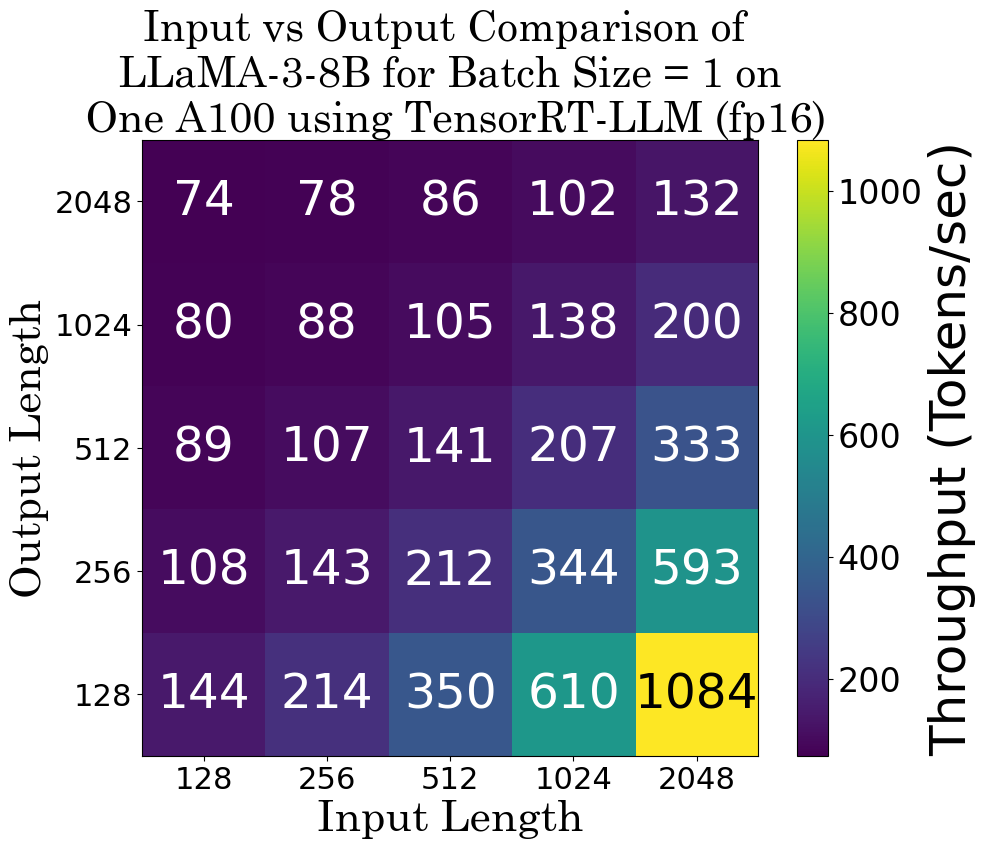

In [2]:
import csv
import matplotlib.pyplot as plt

def read_csv_without_header(csv_file):
    with open(csv_file, "r", newline="") as f:
        reader = csv.reader(f)
        next(reader)

        rows = []
        for row in reader:
            rows.append(row)

    return rows


def read_file(desired_model_name, desired_Input_length, desired_Output_length, desired_batch_size, desired_tensor_parallel):
    
    csv_file = "Heatmap_input_vs_output.csv"
    rows     = read_csv_without_header(csv_file)
    found    = False
    
    for row in rows: 
        if row != []:
            model_name      = str(row[0])
            tensor_parallel = int(row[1])
            precision       = str(row[2])
            
            input_length    = int(row[3])
            output_length   = int(row[4])
            batch_size      = int(row[5])
            int8_kv_cache   = str(row[6])

            if model_name == desired_model_name:
                if desired_Input_length==input_length and desired_Output_length==output_length and desired_batch_size==batch_size and desired_tensor_parallel==tensor_parallel:
                    found = True
                    latency         = float(row[7])
                    throughput      = round(float(row[8])) 
                    break

    if found == False:
        print("Not found")
    
    return throughput

def plot_heat_map(model_name, Label_Model_Name, batch_size, tensor_parallel):

    Input_length_list  = [128, 256, 512, 1024, 2048]
    Output_length_list = [2048, 1024, 512, 256, 128]

    results = []
    for Output_length in Output_length_list:
        one_D_array = []
        for Input_length in Input_length_list:
            throughput = read_file(desired_model_name = model_name,  
                                   desired_Input_length  = Input_length,
                                   desired_Output_length = Output_length,
                                   desired_batch_size    = batch_size,
                                  desired_tensor_parallel = tensor_parallel)
            one_D_array.append(throughput)
        results.append(one_D_array)

    markersize = 7
    linewidth  = 3

    fontsize   = 30
    ticks_fontsize = 22
    legend_fontsize = 24 
    digit_fontsize = 35

    plt.subplots(figsize=(10, 8))    
    plt.imshow(results, cmap='viridis')

    plt.xlabel("Input Length", fontfamily='Century Schoolbook', fontsize=fontsize+1)
    plt.ylabel("Output Length", fontfamily='Century Schoolbook', fontsize=fontsize+1)

    plt.xticks(range(len(Input_length_list)), Input_length_list, fontsize=fontsize)
    plt.yticks(range(len(Output_length_list)), Output_length_list, fontsize=fontsize)

    for i in range(len(Input_length_list)):
        for j in range(len(Output_length_list)):
            if results[i][j] == 1084:
                plt.text(j, i, results[i][j], ha='center', va='center', color='black', fontsize=digit_fontsize)
            else:
                plt.text(j, i, results[i][j], ha='center', va='center', color='white', fontsize=digit_fontsize)
                
    # plt.subplots(figsize=(10, 8))

    cbar = plt.colorbar(label='Throughput')
    cbar.ax.tick_params(labelsize=24)
    cbar.set_label('Throughput (Tokens/sec)', fontsize=fontsize+6)

    plt.xticks(fontsize=ticks_fontsize)
    plt.yticks(fontsize=ticks_fontsize)
    
    title = f"Input vs Output Comparison of \n {Label_Model_Name} for Batch Size = {batch_size} on \n One A100 using TensorRT-LLM (fp16)"
    
    plt.title(title, fontfamily='Century Schoolbook', fontsize=fontsize)
    
    plt.savefig('llama_3_8B_Heatmap_TensorRT_LLM.pdf', bbox_inches='tight')
    plt.show()    


    
plot_heat_map(model_name = "meta-llama/Meta-Llama-3-8B",
              Label_Model_Name = "LLaMA-3-8B",
              batch_size = 1,
             tensor_parallel = 1)
